In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

In [2]:
prev_df = pd.read_csv("home-credit-default-risk\previous_application.csv")

In [3]:
prev_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [4]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

###### <b>SK_ID_PREV</b>: ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) <b>(id của previous loan)</b>
###### <b>SK_ID_CURR</b>: ID of loan in our sample <b>(id của current loan)</b>
###### <b>NAME_CONTRACT_TYPE</b>: "Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application" <b>(loại hình của khoản vay)</b>
###### <b>AMT_ANNUITY</b>: Annuity of previous application <b>(trái phiếu đồng niên)</b>
###### <b>AMT_APPLICATION</b>: For how much credit did client ask on the previous application <b>(số tiền đăng kí vay)</b>
###### <b>AMT_CREDIT</b>: "Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT" <b>(số tiền thực sự nhận được)</b>
###### <b>AMT_DOWN_PAYMENT</b>: Down payment on the previous application <b>(tiền trả trước, tiền đặt cọc)</b>
###### <b>AMT_GOODS_PRICE</b>: Goods price of good that client asked for (if applicable) on the previous application <b>(giá của sản phẩm của lần vay trước)</b>
###### <b>WEEKDAY_APPR_PROCESS_START</b>: On which day of the week did the client apply for previous application <b>(ngày đăng kí)</b>
###### <b>HOUR_APPR_PROCESS_START</b>: Approximately at what day hour did the client apply for the previous application <b>(giờ đăng kí)</b>
###### <b>FLAG_LAST_APPL_PER_CONTRACT</b>: Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract <b>(đánh dấu dòng là application cuối dùng của contract cho vay, đôi khi có nhiều application cho 1 contract vay)</b>
###### <b>NFLAG_LAST_APPL_IN_DAY</b>: Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice <b>(đánh dấu dòng là application cuối cùng trong ngày của khách, đôi khi khách apply nhiều lần trong 1 ngày)</b>
###### <b>NFLAG_MICRO_CASH</b>: Flag Micro finance loan <b>(đánh dấu là vay tài chính vi mô)</b>
###### <b>RATE_DOWN_PAYMENT</b>: Down payment rate normalized on previous credit <b>(tỉ lệ tiền đặt cọc (normalized))</b>
###### <b>RATE_INTEREST_PRIMARY</b>: Interest rate normalized on previous credit <b>(tỉ lệ lãi xuất chính (normalized))</b>
###### <b>RATE_INTEREST_PRIVILEGED</b>: Interest rate normalized on previous credit <b>( tỉ lệ lãi xuất ưu tiên (normalized))</b>
###### <b>NAME_CASH_LOAN_PURPOSE</b>: Purpose of the cash loan <b>(mục đích vay)</b>
###### <b>NAME_CONTRACT_STATUS</b>: "Contract status (approved, cancelled, ...) of previous application" <b>(tình trạng của hợp đồng (approved, cancelled, ...))</b>
###### <b>DAYS_DECISION</b>: Relative to current application when was the decision about previous application made
###### <b>NAME_PAYMENT_TYPE</b>: Payment method that client chose to pay for the previous application <b>(cách khách hàng trả tiền cho khoảng nợ cũ)</b>
###### <b>CODE_REJECT_REASON</b>: Why was the previous application rejected <b>(lý do chính khi bị từ chối cho vay)</b>
###### <b>NAME_TYPE_SUITE</b>: Who accompanied client when applying for the previous application <b>(người đi cùng với khách hàng khi apply vay)</b>
###### <b>NAME_CLIENT_TYPE</b>: Was the client old or new client when applying for the previous application <b>(phân loại người vay mới hay cũ)</b>
###### <b>NAME_GOODS_CATEGORY</b>: What kind of goods did the client apply for in the previous application <b>(thể loại sản phẩm mà khách hàng apply vay để mua)</b>
###### <b>NAME_PORTFOLIO</b>: "Was the previous application for CASH, POS, CAR,.." <b>(loại hình vay)</b>
###### <b>NAME_PRODUCT_TYPE</b>: Was the previous application x-sell or walk-in <b>(khoản vay cũ được bán chéo hay khách hàng randomly vào vay)</b>
###### <b>CHANNEL_TYPE</b>: Through which channel we acquired the client on the previous application <b>(có được khách thông qua kênh nào)</b>
###### <b>SELLERPLACE_AREA</b>: Selling area of seller place of the previous application <b>(khu vực bán của lần apply trước)</b>
###### <b>NAME_SELLER_INDUSTRY</b>: The industry of the seller <b>(lĩnh vực của người bán)</b>
###### <b>CNT_PAYMENT</b>: Term of previous credit at application of the previous application <b>(thời hạn của tín dụng trước)</b>
###### <b>NAME_YIELD_GROUP</b>: Grouped interest rate into small medium and high of the previous application <b>(phân khúc của interest rate)</b>
###### <b>PRODUCT_COMBINATION</b>: Detailed product combination of the previous application <b>(sản phẩm kết hợp với lần vay trước)</b>
###### <b>DAYS_FIRST_DRAWING</b>: Relative to application date of current application when was the first disbursement of the previous application <b>(liên hệ giữa ngày nộp đơn hiện tại với ngày giải ngân của lần vay trước)</b>
###### <b>DAYS_FIRST_DUE</b>: Relative to application date of current application when was the first due supposed to be of the previous application <b>(liên hệ giữa ngày nộp đơn hiện tại với ngày đáo hạn của lần vay trước)</b>
###### <b>DAYS_LAST_DUE_1ST_VERSION</b>: Relative to application date of current application when was the first due of the previous application <b>(liên hệ giữa ngày nộp đơn hiện tại với ngày đáo hạn đầu tiên của lần vay trước)</b>
###### <b>DAYS_LAST_DUE</b>: Relative to application date of current application when was the last due date of the previous application <b>(liên hệ giữa ngày nộp đơn hiện tại với ngày đáo hạn cuối cùng của lần vay trước)</b>
###### <b>DAYS_TERMINATION</b>: Relative to application date of current application when was the expected termination of the previous application <b>(liên hệ giữa ngày nộp đơn hiện tại với dự kiến chấm dứt)</b>
###### <b>NFLAG_INSURED_ON_APPROVAL</b>: Did the client requested insurance during the previous application <b>(khách hàng có yêu cầu bảo hiểm hay không)</b>


In [5]:
prev_df.duplicated().sum()

0

In [6]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(prev_df)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

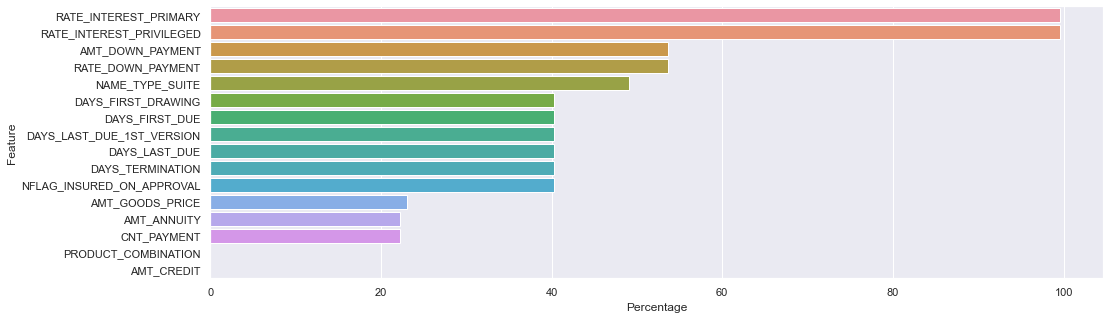

In [7]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

###### Drop <b>columns RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED </b> vì 99% data null
###### Drop row contain missing values for feature <b>PRODUCT_COMBINATION, AMT_CREDIT </b>. Dropping would not cause impact because is only very low percentage

In [8]:
prev_df.drop(labels=["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"],axis=1, inplace= True)

In [9]:
prev_df["AMT_CREDIT"].fillna(0, inplace=True)
prev_df["PRODUCT_COMBINATION"].fillna(prev_df["PRODUCT_COMBINATION"].mode()[0], inplace= True)

In [10]:
check_missed_values(prev_df)

,Feature,Percentage
0,AMT_DOWN_PAYMENT,53.636480
1,RATE_DOWN_PAYMENT,53.636480
2,NAME_TYPE_SUITE,49.119754
3,DAYS_FIRST_DRAWING,40.298129
4,DAYS_FIRST_DUE,40.298129
5,DAYS_LAST_DUE_1ST_VERSION,40.298129
6,DAYS_LAST_DUE,40.298129
7,DAYS_TERMINATION,40.298129
8,NFLAG_INSURED_ON_APPROVAL,40.298129
9,AMT_GOODS_PRICE,23.081773


In [11]:
numeric_df = prev_df._get_numeric_data()
numeric_col = [col for col in numeric_df.columns if col not in ["SK_ID_PREV", "SK_ID_CURR","HOUR_APPR_PROCESS_START","NFLAG_LAST_APPL_IN_DAY","DAYS_DECISION","SELLERPLACE_AREA"]]
numeric_df = numeric_df[numeric_col]
numeric_df_corr = numeric_df.corr()
numeric_df_corr

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
AMT_ANNUITY,1.000000,0.808872,0.816429,0.267694,0.820895,-0.103878,0.394535,0.052839,-0.053295,-0.068877,0.082659,0.068022,0.283080
AMT_APPLICATION,0.808872,1.000000,0.975824,0.482776,0.999884,-0.072479,0.680630,0.074544,-0.049532,-0.084905,0.172627,0.148618,0.259219
AMT_CREDIT,0.816429,0.975824,1.000000,0.301284,0.993087,-0.188128,0.674278,-0.036813,0.002881,0.044031,0.224829,0.214320,0.263932
AMT_DOWN_PAYMENT,0.267694,0.482776,0.301284,1.000000,0.482776,0.473935,0.031659,-0.001773,-0.013586,-0.000869,-0.031425,-0.030702,-0.042585
AMT_GOODS_PRICE,0.820895,0.999884,0.993087,0.482776,1.000000,-0.072479,0.672129,-0.024445,-0.021062,0.016883,0.211696,0.209296,0.243400
RATE_DOWN_PAYMENT,-0.103878,-0.072479,-0.188128,0.473935,-0.072479,1.000000,-0.278875,-0.007969,-0.039178,-0.010934,-0.147562,-0.145461,-0.021633
CNT_PAYMENT,0.394535,0.680630,0.674278,0.031659,0.672129,-0.278875,1.000000,0.309900,-0.204907,-0.381013,0.088903,0.055121,0.320520
DAYS_FIRST_DRAWING,0.052839,0.074544,-0.036813,-0.001773,-0.024445,-0.007969,0.309900,1.000000,0.004710,-0.803494,-0.257466,-0.396284,0.177652
DAYS_FIRST_DUE,-0.053295,-0.049532,0.002881,-0.013586,-0.021062,-0.039178,-0.204907,0.004710,1.000000,0.513949,0.401838,0.323608,-0.119048
DAYS_LAST_DUE_1ST_VERSION,-0.068877,-0.084905,0.044031,-0.000869,0.016883,-0.010934,-0.381013,-0.803494,0.513949,1.000000,0.423462,0.493174,-0.221947


<AxesSubplot:>

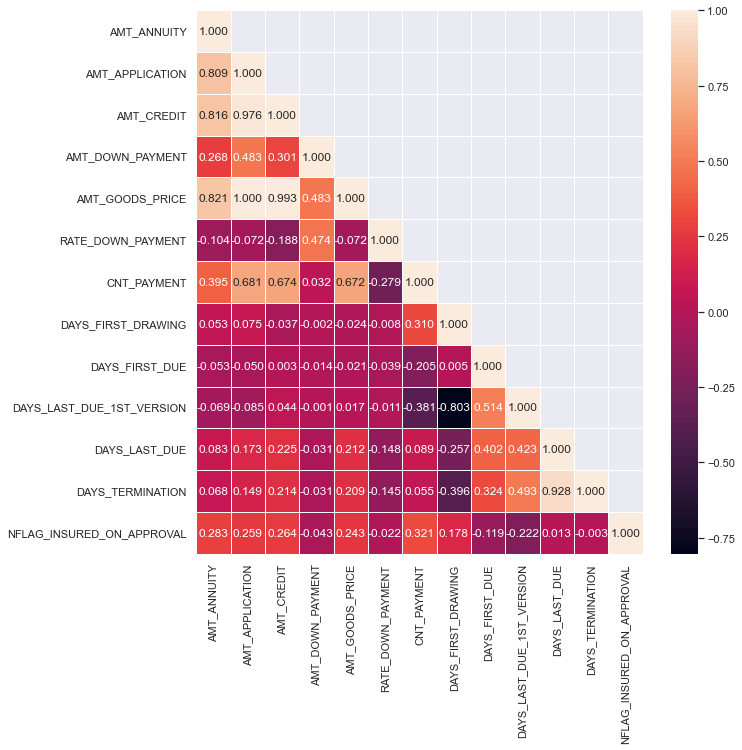

In [12]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

###### "DAYS_LAST_DUE" and "DAYS_TERMINATION" highly correlated
###### "DAYS_FIRST_DRAWING" and "DAYS_LAST_DUE_1ST_VERSION"
###### "AMT_ANNUTY", "AMT_APPLICATION", "AMT_CREDIT" and "AMT_GOODS_PRICE" are highly corrlelated

###### "DAYS_TERMINATION", "DAYS_LAST_DUE_1ST_VERSION", "AMT_APPLICATION", "AMT_CREDIT" and "AMT_GOODS_PRICE" can be removed to prevent collinearity

In [13]:
prev_df['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
prev_df['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
prev_df['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
prev_df['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
prev_df['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

#### For EDA purpose we are not removing them

In [14]:
curr_df = pd.read_csv("home-credit-default-risk/application_train.csv")
curr_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
prev_df_drop = prev_df.drop(["SK_ID_PREV"], axis=1)
prev_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE           1670214 non-null  object 
 2   AMT_ANNUITY                  1297979 non-null  float64
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670214 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1670214 non-n

In [16]:
prev_df_merged = pd.merge(curr_df[["SK_ID_CURR", "TARGET"]], prev_df, how= "left", on=["SK_ID_CURR"])
prev_df_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,...,Auto technology,24.0,low_normal,POS other with interest,NaN,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,...,XNA,12.0,low_normal,Cash X-Sell: low,NaN,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,...,Furniture,6.0,middle,POS industry with interest,NaN,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,...,Consumer electronics,12.0,middle,POS household with interest,NaN,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,...,Connectivity,4.0,middle,POS mobile without interest,NaN,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,2073384.0,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,...,XNA,24.0,middle,Cash X-Sell: middle,NaN,-618.0,72.0,-558.0,-528.0,1.0
1430151,456255,0,1708056.0,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,SUNDAY,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1430152,456255,0,1296007.0,Cash loans,30737.655,765000.0,1067940.0,NaN,765000.0,FRIDAY,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1430153,456255,0,2631384.0,Cash loans,54022.140,1170000.0,1271929.5,NaN,1170000.0,FRIDAY,...,XNA,36.0,low_normal,Cash X-Sell: low,NaN,-756.0,294.0,-66.0,-64.0,0.0


In [17]:
prev_df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1430155.0,2.784702e+05,102802.095340,1.000020e+05,1.893610e+05,2.789560e+05,3.675090e+05,456255.000
TARGET,1430155.0,8.624240e-02,0.280722,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000
SK_ID_PREV,1413701.0,1.922744e+06,532715.335255,1.000001e+06,1.461346e+06,1.922698e+06,2.384012e+06,2845381.000
AMT_ANNUITY,1106483.0,1.583718e+04,14724.906897,0.000000e+00,6.257858e+03,1.122376e+04,2.042078e+04,418058.145
AMT_APPLICATION,1413701.0,1.752436e+05,293622.193141,0.000000e+00,1.975050e+04,7.087050e+04,1.800000e+05,5850000.000
AMT_CREDIT,1413701.0,1.963539e+05,319481.180403,0.000000e+00,2.488050e+04,8.059500e+04,2.156400e+05,4509688.500
AMT_DOWN_PAYMENT,664161.0,6.655317e+03,20620.300440,-9.000000e-01,0.000000e+00,1.791000e+03,7.695000e+03,3060045.000
AMT_GOODS_PRICE,1094176.0,2.264512e+05,315937.604200,0.000000e+00,4.982850e+04,1.102455e+05,2.295000e+05,5850000.000
HOUR_APPR_PROCESS_START,1413701.0,1.247893e+01,3.331474,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1413701.0,9.964321e-01,0.059626,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000


<AxesSubplot:xlabel='AMT_ANNUITY'>

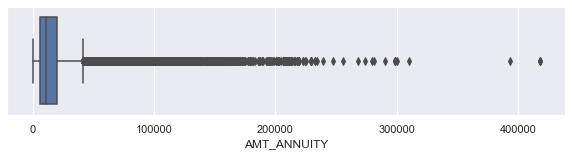

In [18]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_df_merged["AMT_ANNUITY"])

<AxesSubplot:xlabel='AMT_DOWN_PAYMENT'>

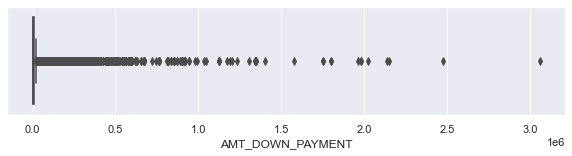

In [19]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_df_merged["AMT_DOWN_PAYMENT"])

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

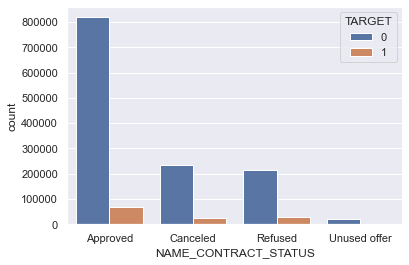

In [20]:
sns.countplot(prev_df_merged["NAME_CONTRACT_STATUS"], hue= prev_df_merged["TARGET"])

In [21]:
total_approved = prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Approved"].shape[0]
default_approved = prev_df_merged[(prev_df_merged["NAME_CONTRACT_STATUS"] == "Approved") & (prev_df_merged["TARGET"] == 1)].shape[0]

print(f"Tỉ lệ vỡ nợ của những khách hàng có những khoảng vay cũ thành công: {default_approved/total_approved * 100}")

Tỉ lệ vỡ nợ của những khách hàng có những khoảng vay cũ thành công: 7.588655443691958


In [22]:
total_refused = prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused"].shape[0]
nondefault_refused = prev_df_merged[(prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused") & (prev_df_merged["TARGET"] == 0)].shape[0]

print(f"Tỉ lệ trả nợ thành công của những khách hàng bị từ chối ở khoản vay trước đó: {nondefault_refused/total_refused * 100}")

Tỉ lệ trả nợ thành công của những khách hàng bị từ chối ở khoản vay trước đó: 88.00358612820408


[Text(0.5, 1.0, 'Defaulter')]

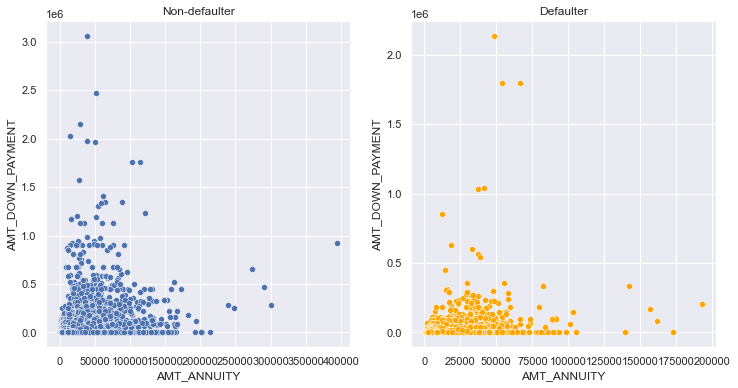

In [23]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.scatterplot(prev_df_merged[prev_df_merged["TARGET"] == 0]["AMT_ANNUITY"], prev_df_merged[prev_df_merged["TARGET"] == 0]["AMT_DOWN_PAYMENT"], ax= ax[0]).set(title="Non-defaulter")
sns.scatterplot(prev_df_merged[prev_df_merged["TARGET"] == 1]["AMT_ANNUITY"], prev_df_merged[prev_df_merged["TARGET"] == 1]["AMT_DOWN_PAYMENT"], ax= ax[1], color= "orange").set( title="Defaulter")

##### AMT_ANNUITY càng cao thì số lượng người vỡ nợ càng giảm
##### DOWN_PAYMENT càng cao thì số lượng người vỡ nợ càng giảm

[Text(0.5, 1.0, 'Defaulter')]

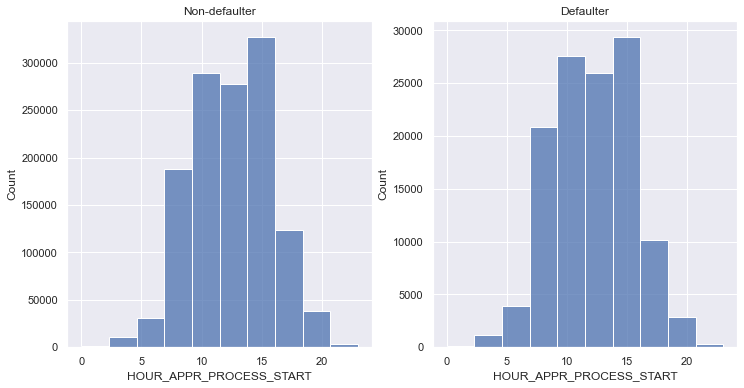

In [24]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(prev_df_merged[prev_df_merged["TARGET"] == 0]["HOUR_APPR_PROCESS_START"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(prev_df_merged[prev_df_merged["TARGET"] == 1]["HOUR_APPR_PROCESS_START"], ax= ax[1], bins=10).set(title = "Defaulter")

###### các khoản vay dường như tập trung vào lúc 15h Feature này có thể bỏ do không có nhiều impact cho biến Target


[Text(0, 0, 'FRIDAY'),
 Text(1, 0, 'MONDAY'),
 Text(2, 0, 'SATURDAY'),
 Text(3, 0, 'SUNDAY'),
 Text(4, 0, 'THURSDAY'),
 Text(5, 0, 'TUESDAY'),
 Text(6, 0, 'WEDNESDAY')]

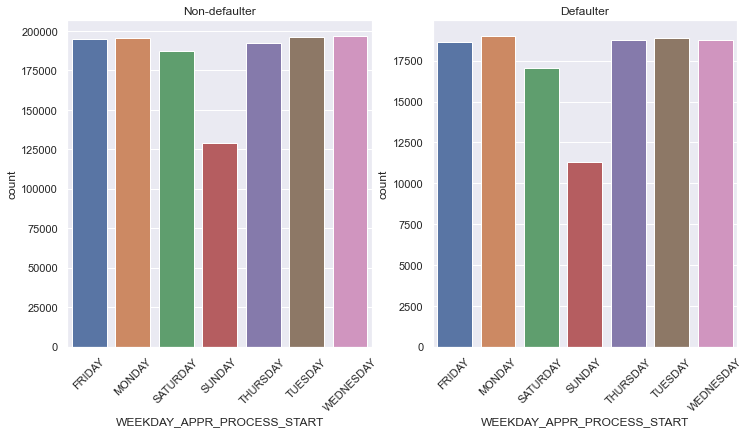

In [25]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(prev_df_merged[prev_df_merged["TARGET"] == 0]["WEEKDAY_APPR_PROCESS_START"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)

sns.countplot(prev_df_merged[prev_df_merged["TARGET"] == 1]["WEEKDAY_APPR_PROCESS_START"].sort_values(), ax= ax[1]).set(title = "Defaulter")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 45)

#### các khoản vay dường như tập trung vào cuối tuần Feature này có thể bỏ do không có nhiều impact cho biến Target

[Text(0.5, 1.0, 'Defaulter')]

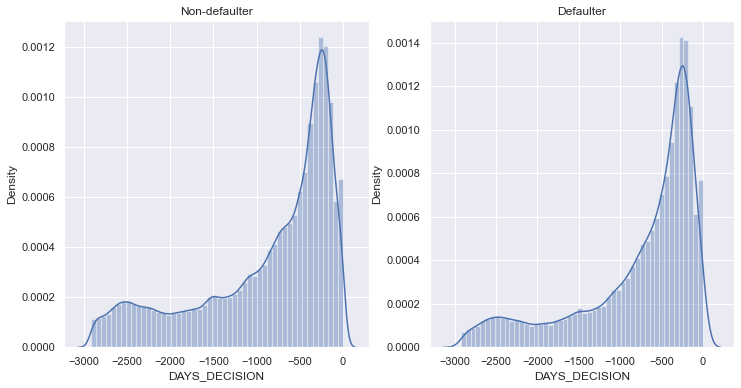

In [26]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(prev_df_merged[prev_df_merged["TARGET"] == 0]["DAYS_DECISION"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")

sns.distplot(prev_df_merged[prev_df_merged["TARGET"] == 1]["DAYS_DECISION"].sort_values(), ax= ax[1]).set(title = "Defaulter")

#### DAYS_DECISION có distribution giống  Feature này có thể bỏ do không có nhiều impact cho biến Target

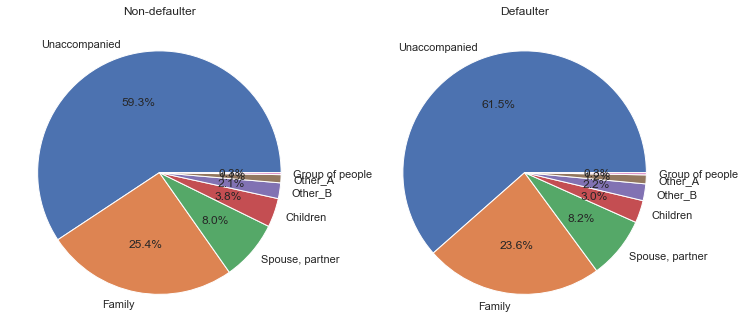

In [27]:
def categories_pie_plot(x):
    fig, ax = plt.subplots(1,2, figsize= (12,6))

    x1 = prev_df_merged[prev_df_merged["TARGET"] == 0][x].value_counts(normalize= True).sort_values(ascending= False)
    ax[0].pie(x1, labels= x1.index, autopct='%1.1f%%')
    ax[0].title.set_text("Non-defaulter")

    x2 = prev_df_merged[prev_df_merged["TARGET"] == 1][x].value_counts(normalize= True).sort_values(ascending= False)
    ax[1].pie(x2, labels=x2.index, autopct='%1.1f%%')
    ax[1].title.set_text("Defaulter")

categories_pie_plot("NAME_TYPE_SUITE")

#### NAME_TYPE_SUITE có distribution giống  Feature này có thể bỏ do không có nhiều impact cho biến Target

[Text(-10000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10000.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(30000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(50000.0, 0, ''),
 Text(60000.0, 0, ''),
 Text(70000.0, 0, ''),
 Text(80000.0, 0, '')]

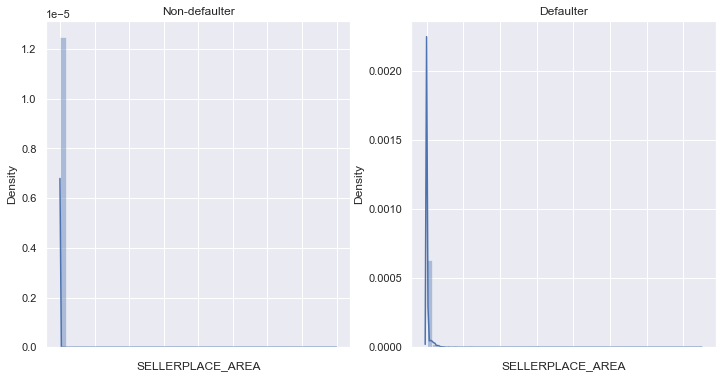

In [28]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(prev_df_merged[prev_df_merged["TARGET"] == 0]["SELLERPLACE_AREA"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)

sns.distplot(prev_df_merged[prev_df_merged["TARGET"] == 1]["SELLERPLACE_AREA"].sort_values(), ax= ax[1]).set(title = "Defaulter")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 45)

#### SELLERPLACE_AREA có distribution giống  Feature này có thể bỏ do không có nhiều impact cho biến Target

[Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, '')]

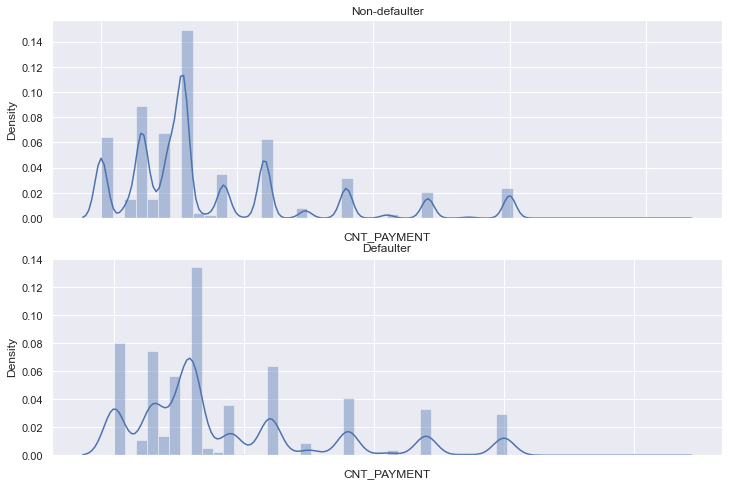

In [29]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
sns.distplot(prev_df_merged[prev_df_merged["TARGET"] == 0]["CNT_PAYMENT"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)

sns.distplot(prev_df_merged[prev_df_merged["TARGET"] == 1]["CNT_PAYMENT"].sort_values(), ax= ax[1]).set(title = "Defaulter")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 45)

[Text(-3500.0, 0, ''),
 Text(-3000.0, 0, ''),
 Text(-2500.0, 0, ''),
 Text(-2000.0, 0, ''),
 Text(-1500.0, 0, ''),
 Text(-1000.0, 0, ''),
 Text(-500.0, 0, ''),
 Text(0.0, 0, ''),
 Text(500.0, 0, '')]

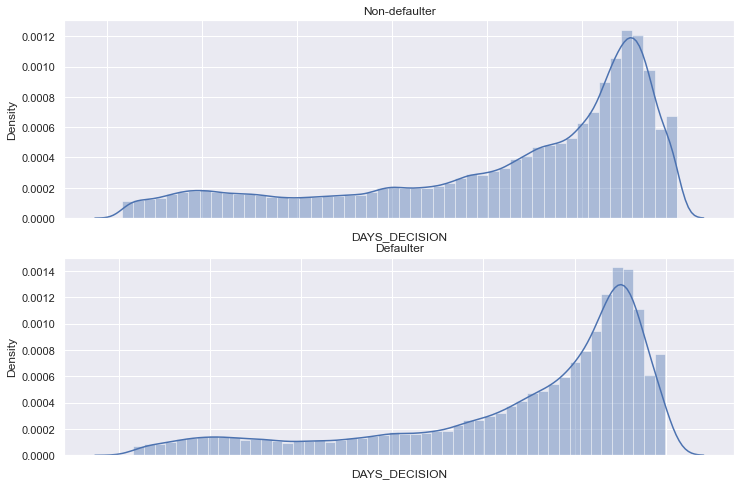

In [30]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
sns.distplot(prev_df_merged[prev_df_merged["TARGET"] == 0]["DAYS_DECISION"].sort_values(), ax= ax[0]).set(title = "Non-defaulter")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)

sns.distplot(prev_df_merged[prev_df_merged["TARGET"] == 1]["DAYS_DECISION"].sort_values(), ax= ax[1]).set(title = "Defaulter")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 45)

[Text(0.5, 1.0, 'Defaulter')]

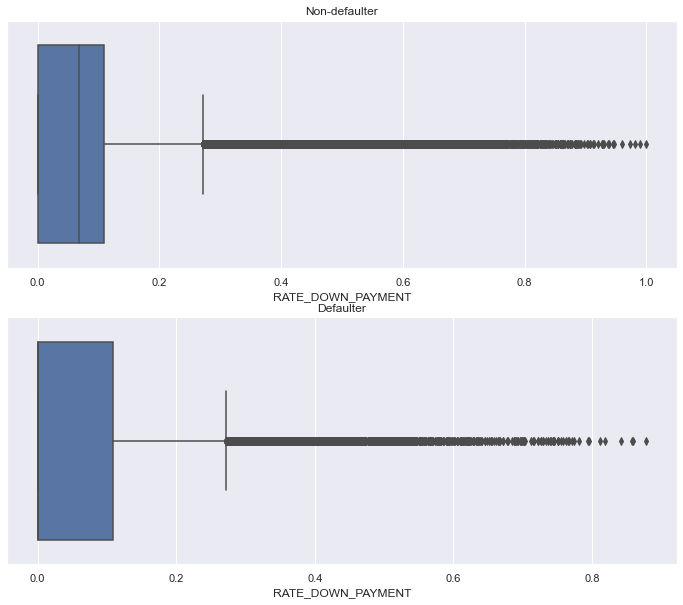

In [31]:
fid, ax = plt.subplots(2,1,figsize= (12,10))
sns.boxplot(prev_df_merged[prev_df_merged["TARGET"] == 0]["RATE_DOWN_PAYMENT"], ax = ax[0]).set(title= "Non-defaulter")
sns.boxplot(prev_df_merged[prev_df_merged["TARGET"] == 1]["RATE_DOWN_PAYMENT"], ax = ax[1]).set(title= "Defaulter")

In [32]:
print(prev_df_merged[prev_df_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99]))
print(prev_df_merged[prev_df_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99]))

0.50    0.067233
0.70    0.108909
0.90    0.212315
0.95    0.299530
0.99    0.522992
Name: RATE_DOWN_PAYMENT, dtype: float64
0.50    0.000000
0.70    0.103965
0.90    0.199209
0.95    0.237696
0.99    0.477945
Name: RATE_DOWN_PAYMENT, dtype: float64


#### có vẻ như những khách hàng có rate down payment thấp hơn có khả năng vỡ nợ cao hơn

## Phân tích các biến Catergories

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

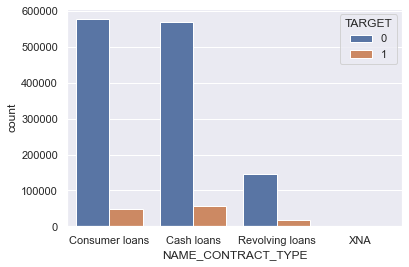

In [33]:
sns.countplot(prev_df_merged["NAME_CONTRACT_TYPE"], hue= prev_df_merged["TARGET"])

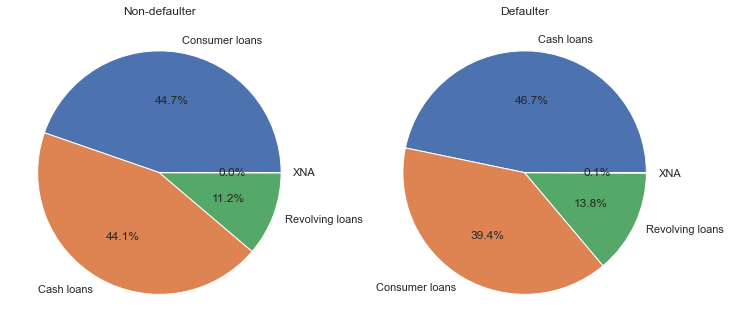

In [34]:
categories_pie_plot("NAME_CONTRACT_TYPE")

###### Hầu hết khách hàng vay tiêu dùng

<AxesSubplot:xlabel='CODE_REJECT_REASON', ylabel='count'>

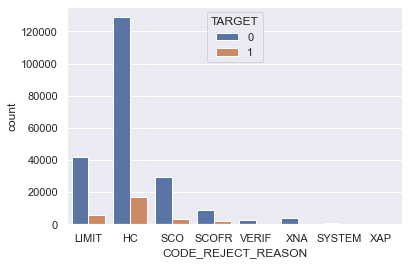

In [35]:
sns.countplot(prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"], hue= prev_df_merged["TARGET"])

In [36]:
prev_df_merged[prev_df_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"].value_counts()

HC        145984
LIMIT      47773
SCO        32636
SCOFR      10875
XNA         4370
VERIF       3079
SYSTEM       672
XAP            1
Name: CODE_REJECT_REASON, dtype: int64

###### "SCO", "LIMIT", "HC" là những lý do bị refused nhiều nhất

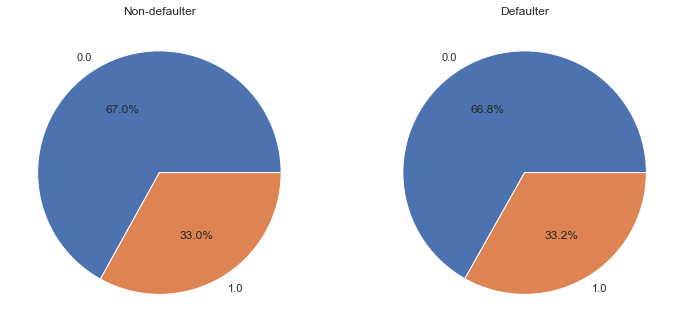

In [37]:
categories_pie_plot('NFLAG_INSURED_ON_APPROVAL')

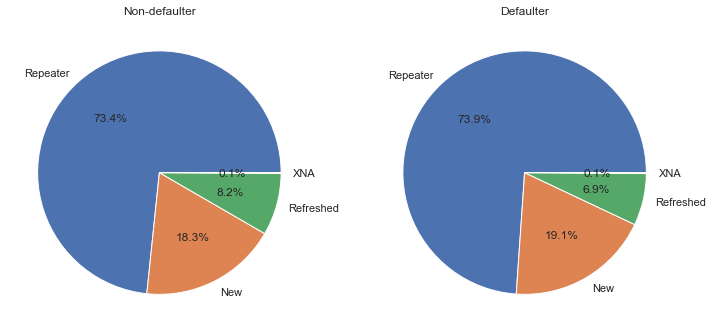

In [38]:
categories_pie_plot("NAME_CLIENT_TYPE")

#### phần lớn người vay là repeater (khách hàng trung thành)

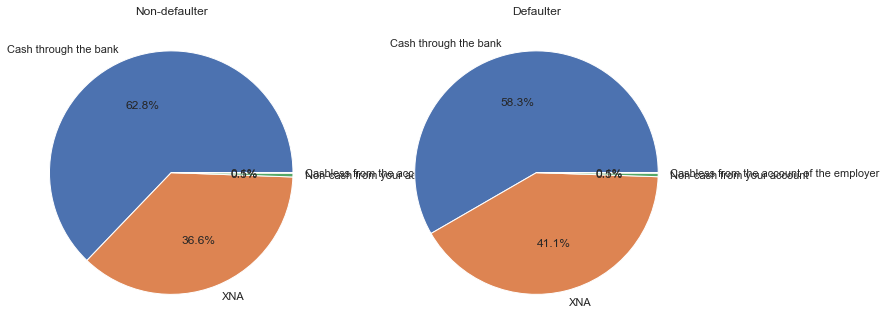

In [39]:
categories_pie_plot("NAME_PAYMENT_TYPE")

#### cash through bank là phương thức được sử dụng nhiều

In [40]:
def defaulter_percentage_count_per_cat(df, col):
    summary = []
    for cat in df[col].unique():
        default_count = df[(df[col] == cat) & (df.TARGET == 1)].shape[0]
        total_count = df[df[col] == cat].shape[0]
        if total_count == 0:
            pass
        else:
            summary.append([cat ,default_count * 100 / total_count])

    report_df = pd.DataFrame(summary)
    report_df.columns = ["Categories", "Percentage_Of_Default"]
    return report_df.sort_values(by='Percentage_Of_Default', ascending=False)

<AxesSubplot:xlabel='Percentage_Of_Default', ylabel='Categories'>

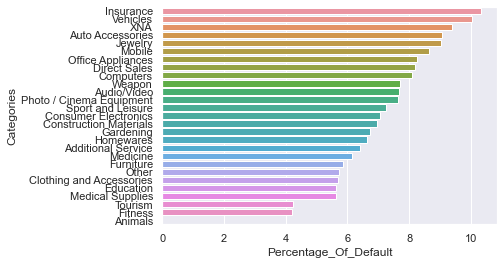

In [41]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_GOODS_CATEGORY"), y= "Categories", x= "Percentage_Of_Default")

###### Khách hàng vay mua bảo hiểm và xe có tỉ lệ vỡ nợ cao nhất

<AxesSubplot:xlabel='Percentage_Of_Default', ylabel='Categories'>

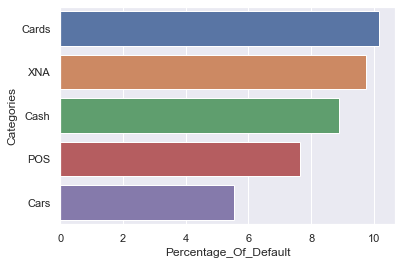

In [42]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_PORTFOLIO"), y= "Categories", x= "Percentage_Of_Default")
## Cards có tỉ lệ nợ cao nhất

<AxesSubplot:xlabel='Percentage_Of_Default', ylabel='Categories'>

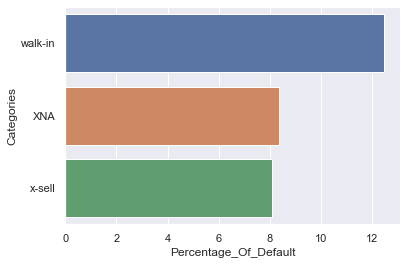

In [43]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_PRODUCT_TYPE"), y= "Categories", x= "Percentage_Of_Default")
## walk-in có tỉ lệ nợ cao nhất

<AxesSubplot:xlabel='Percentage_Of_Default', ylabel='Categories'>

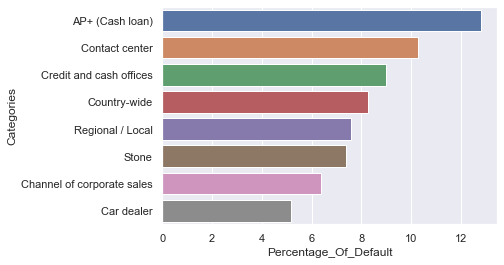

In [44]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "CHANNEL_TYPE"), y= "Categories", x= "Percentage_Of_Default")
## AP+ có tỉ lệ nợ cao nhất

<AxesSubplot:xlabel='Percentage_Of_Default', ylabel='Categories'>

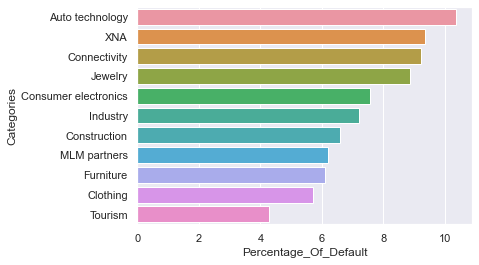

In [45]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_SELLER_INDUSTRY"), y= "Categories", x= "Percentage_Of_Default")
## Auto technology có tỉ lệ nợ cao nhất

<AxesSubplot:xlabel='Percentage_Of_Default', ylabel='Categories'>

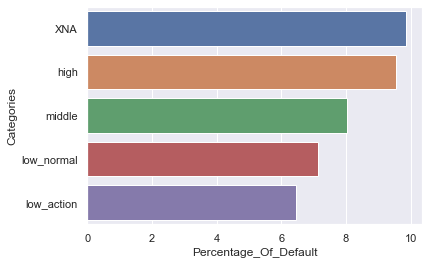

In [46]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_YIELD_GROUP"), y= "Categories", x= "Percentage_Of_Default")
## XNA có tỉ lệ nợ cao nhất

<AxesSubplot:xlabel='Percentage_Of_Default', ylabel='Categories'>

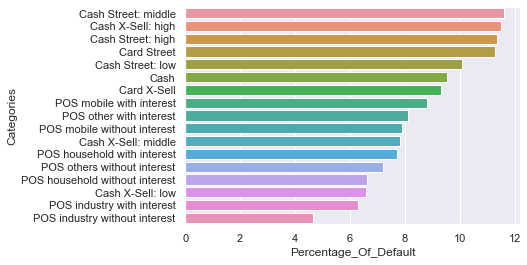

In [47]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "PRODUCT_COMBINATION"), y= "Categories", x= "Percentage_Of_Default")
## Cash Street: middle có tỉ lệ nợ cao nhất

<AxesSubplot:xlabel='Percentage_Of_Default', ylabel='Categories'>

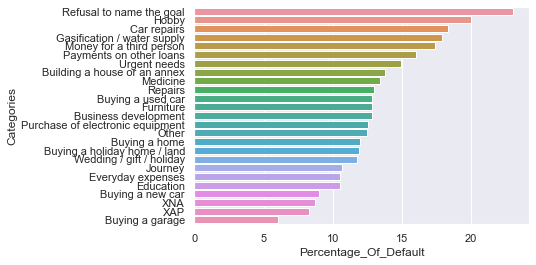

In [48]:
sns.barplot(data= defaulter_percentage_count_per_cat(prev_df_merged, "NAME_CASH_LOAN_PURPOSE"), y= "Categories", x= "Percentage_Of_Default")
## Refusal to name the goal và Hobby có tỉ lệ nợ cao nhất